In [111]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [52]:
path = './dt_data.csv'
df = pd.read_csv(path, index_col=0)

label_encoder = LabelEncoder()

# Chuyển đổi nhãn
df['Rank'] = label_encoder.fit_transform(df['Rank'])
df = df.drop(columns=['Unnamed: 11'])

df.head()

,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
#,,,,,,,,,,
1,0,0,0.0,0,0,2,6,0,6.4,6.4
2,0,0,4.0,0,0,2,5,0,6.4,2.7
3,1,3,8.0,5,4,3,9,4,8.6,6.4
4,1,0,10.0,0,1,0,7,4,7.9,9.1
5,0,0,6.0,7,0,3,0,2,5.7,5.5


Accuracy: 0.67
Accuracy: 0.70
Accuracy: 0.74
Accuracy: 0.72
Accuracy: 0.69
Accuracy: 0.76
Accuracy: 0.78
Accuracy: 0.70
Accuracy: 0.80
Accuracy: 0.74
Accuracy: 0.67
Accuracy: 0.69
Accuracy: 0.67
Accuracy: 0.63
Accuracy: 0.70
Accuracy: 0.76
Accuracy: 0.80
Accuracy: 0.61
Accuracy: 0.67
Accuracy: 0.69
Accuracy: 0.74
Accuracy: 0.70
Accuracy: 0.74
Accuracy: 0.69
Accuracy: 0.69
Accuracy: 0.72
Accuracy: 0.69
Accuracy: 0.56
Accuracy: 0.61
Accuracy: 0.74
Accuracy: 0.56
Accuracy: 0.63
Accuracy: 0.83
Accuracy: 0.70
Accuracy: 0.61
Accuracy: 0.74
Accuracy: 0.69
Accuracy: 0.69
Accuracy: 0.67
Accuracy: 0.74
Accuracy: 0.80
Accuracy: 0.72
Accuracy: 0.72
Accuracy: 0.65
Accuracy: 0.70
Accuracy: 0.72
Accuracy: 0.76
Accuracy: 0.74
Accuracy: 0.69
Accuracy: 0.76
Accuracy: 0.67
Accuracy: 0.74
Accuracy: 0.76
Accuracy: 0.59
Accuracy: 0.76
Accuracy: 0.65
Accuracy: 0.72
Accuracy: 0.67
Accuracy: 0.72
Accuracy: 0.61
Accuracy: 0.69
Accuracy: 0.67
Accuracy: 0.70
Accuracy: 0.65
Accuracy: 0.72
Accuracy: 0.74
Accuracy: 

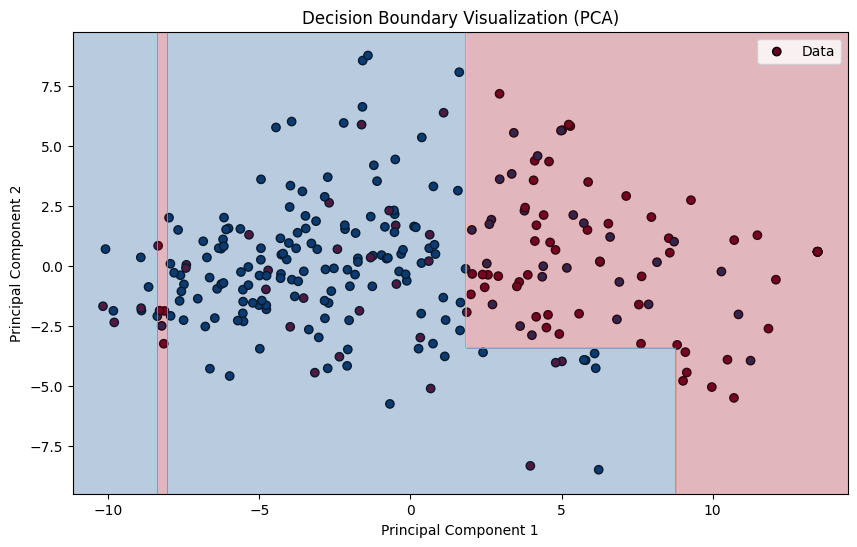

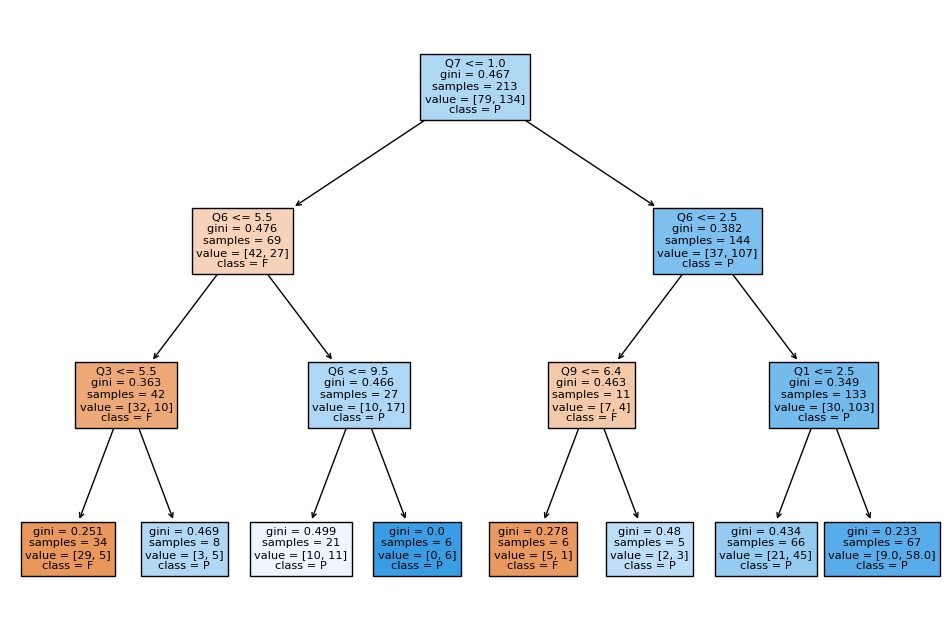

In [118]:
X = df.iloc[:, 1:]
y = df['Rank']
accuracy = 0
count = 1

while accuracy < 0.9:
    # # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the DecisionTreeClassifier
    clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)

    # Train the model
    clf.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Reduce the dimensionality of the data to 2 using PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Train the DecisionTreeClassifier on the PCA-reduced training data
    clf_pca = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
    clf_pca.fit(pca.transform(X_train), y_train)

# Plot scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', label='Data')

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class labels for each point in the mesh grid
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization (PCA)')
plt.legend()

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# # Trực quan hóa cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_,  filled=True)
plt.show()

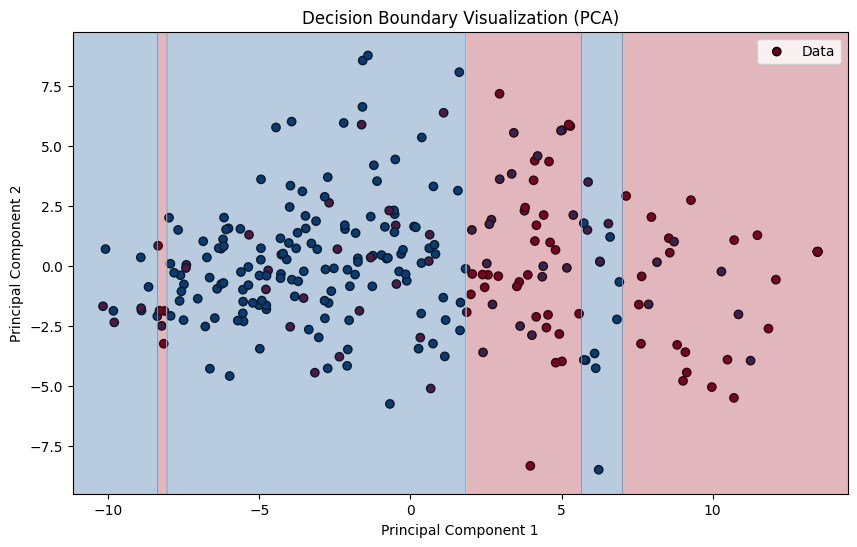

In [109]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train DecisionTreeClassifier on the PCA-reduced data
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)

clf.fit(X_pca, y)

# Plot scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', label='Data')

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization (PCA)')
plt.legend()
plt.show()


Accuracy: 0.9074074074074074
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.93      0.95      0.94        44

    accuracy                           0.91        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.90      0.91      0.91        54

Confusion Matrix:
[[ 7  3]
 [ 2 42]]


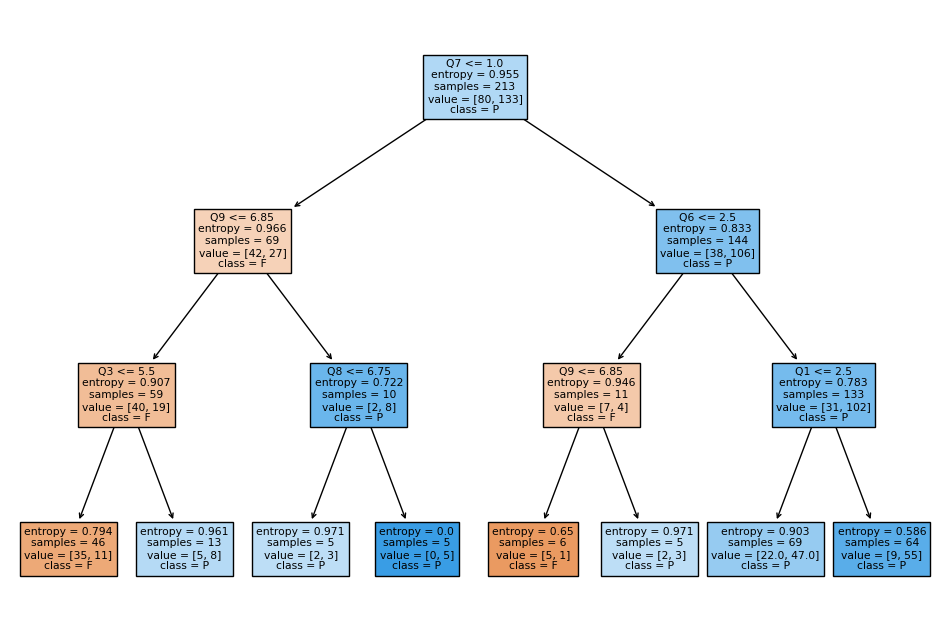

In [117]:
X = df.iloc[:, 1:]
y = df['Rank']
accuracy = 0

while accuracy < 0.9:
    # # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # # Khởi tạo mô hình cây quyết định
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=3, min_samples_leaf=5)

    # # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # # Dự đoán nhãn cho tập kiểm tra
    y_pred = clf.predict(X_test)

# # Đánh giá mô hình
    accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# # Trực quan hóa cây quyết định
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_,  filled=True)
plt.show()
